<IPython.core.display.Javascript object>


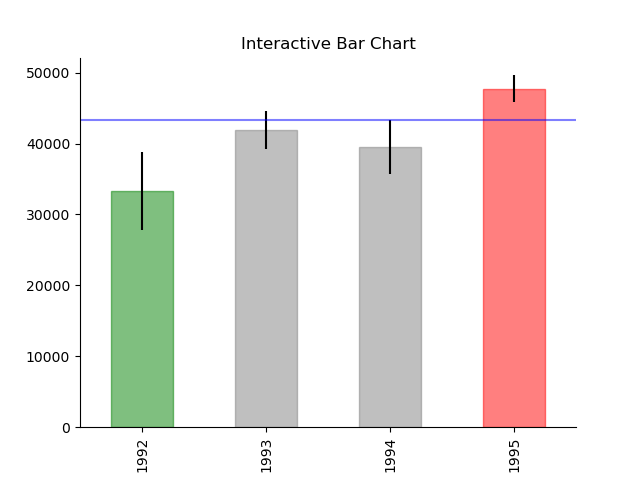

9

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

%matplotlib notebook

np.random.seed(12345)

data = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

title = "Interactive Bar Chart"
confidence_interval = 0.95
maxcolor = 'red'
mincolor = 'green'
normal   = 'grey'

data['mean'] = data.mean(axis=1)
data['std'] = data.std(axis=1)
data['error'] = data['std']/np.sqrt(data.shape[1]) * stats.t.ppf(confidence_interval, data.shape[1]-1)
data['minerror'] = data['mean'] - data['error']
data['maxerror'] = data['mean'] + data['error']

class Location(object):
    df=None
    bl=None
    def __init__(self, ax, bars, dataN):
        self.df  = dataN
        self.bl  = bars
        self.ax  = ax
        self.lx  = ax.axhline(color = 'b', alpha = 0.5)

    def cursor(self, event):
        if not event.inaxes:
            return
        # we just care about the Y axis hence
        y = event.ydata
        # defining set.lx over here so the threshold (in movement with mouse) can be set
        self.lx.set_ydata(y)
        for index, row in self.df.iterrows():
            # the iteration performed below is based on the individual bars to reach requirement
            if row['maxerror']<y:
                self.bl[self.df.index.get_loc(index)].set_color(mincolor)
                continue
            if row['minerror']>y:
                self.bl[self.df.index.get_loc(index)].set_color(maxcolor)
                continue
            # the neutral color is shown when within error limits
            self.bl[self.df.index.get_loc(index)].set_color(normal)
        plt.draw()

def plot_fig(fig_title, c_alpha=0.5):
    # plt.bar not used as it would make a bar container
    ax = data['mean'].plot.bar(range(data.shape[0]), data['mean'], yerr=data['error'], alpha = 0.5, color=normal, title = title)    
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    # get_children is used to get the bars
    return (ax, ax.get_children()[1:5])

ax, barlist = plot_fig(title)
movement = Location(ax, barlist, data)
plt.connect('motion_notify_event', movement.cursor)